In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns
import re as re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from subprocess import check_output

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split,KFold
from sklearn.metrics.classification import classification_report,accuracy_score

In [2]:
data_path = "E:\Analytics_Vidya\Student_Hunt\\train_pCWxroh.csv"
train = pd.read_csv(data_path)
#train = pd.read_csv("../input/train.csv")
data_path = "E:\Analytics_Vidya\Student_Hunt\\test_bKeE5T8.csv"
test = pd.read_csv(data_path)
#test = pd.read_csv("../input/test.csv")

In [3]:
print(train.head())

           ID  Count
0  2011100100    135
1  2011100101     96
2  2011100102    111
3  2011100103    102
4  2011100104     54


In [4]:
print(test.head())

          ﻿ID  Count
0  2013040100    NaN
1  2013040101    NaN
2  2013040102    NaN
3  2013040103    NaN
4  2013040104    NaN


In [5]:
#data = pd.read_csv('AirPassengers.csv')
#print data.head()
print ('\n Data Types:')
print (train.dtypes)


 Data Types:
ID       int64
Count    int64
dtype: object


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d%H')
train.ID = train.ID.astype(str)
train['ID'] = train['ID'].apply(dateparse)
#data = pd.read_csv('E:\Analytics_Vidya\Student_Hunt\\train_pCWxroh.csv', parse_dates='ID',date_parser=dateparse)

In [7]:
print (train.dtypes)

ID       datetime64[ns]
Count             int64
dtype: object


In [8]:
newtrain = train.set_index('ID')

In [9]:
print(newtrain.head())

                     Count
ID                        
2011-10-01 00:00:00    135
2011-10-01 01:00:00     96
2011-10-01 02:00:00    111
2011-10-01 03:00:00    102
2011-10-01 04:00:00     54


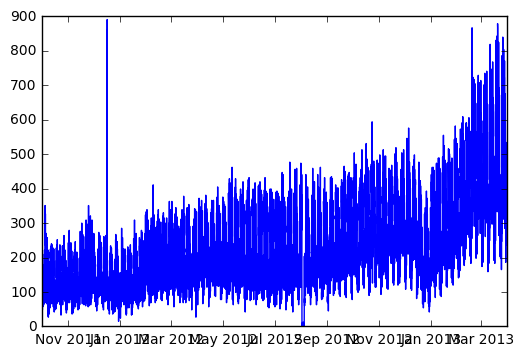

In [10]:
%matplotlib inline
plt.plot(newtrain)

In [12]:
newtrain['2013']

,Count
ID,
2013-01-01 00:00:00,270
2013-01-01 01:00:00,189
2013-01-01 02:00:00,135
2013-01-01 03:00:00,162
2013-01-01 04:00:00,138
2013-01-01 05:00:00,117
2013-01-01 06:00:00,129
2013-01-01 07:00:00,165
2013-01-01 08:00:00,192


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


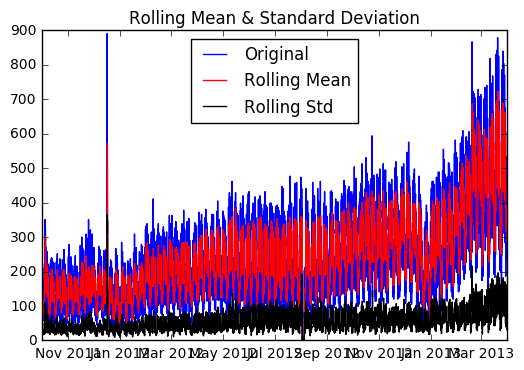

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [14]:
test_stationarity(newtrain)

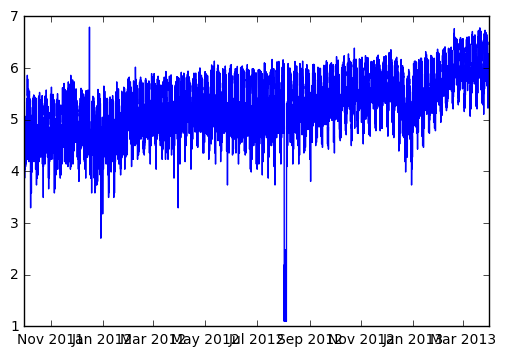

In [15]:
newtrain_log = np.log(newtrain)
plt.plot(newtrain_log)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=2160).mean()
  if __name__ == '__main__':


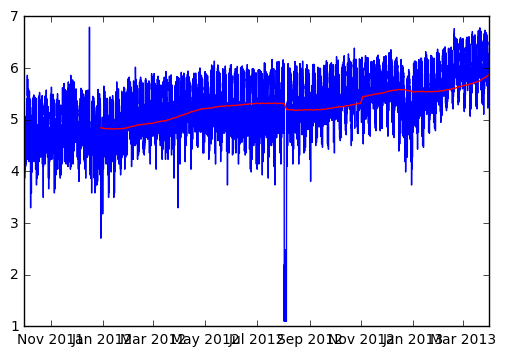

In [16]:
moving_avg = pd.rolling_mean(newtrain_log,24*90)
plt.plot(newtrain_log)
plt.plot(moving_avg, color='red')

In [17]:
ts_log_moving_avg_diff = newtrain_log - moving_avg
ts_log_moving_avg_diff.tail(12)

,Count
ID,
2013-03-31 12:00:00,-0.240744
2013-03-31 13:00:00,-0.138767
2013-03-31 14:00:00,-0.082153
2013-03-31 15:00:00,-0.082128
2013-03-31 16:00:00,-0.209060
2013-03-31 17:00:00,0.014034
2013-03-31 18:00:00,0.116721
2013-03-31 19:00:00,0.344147
2013-03-31 20:00:00,0.160455


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


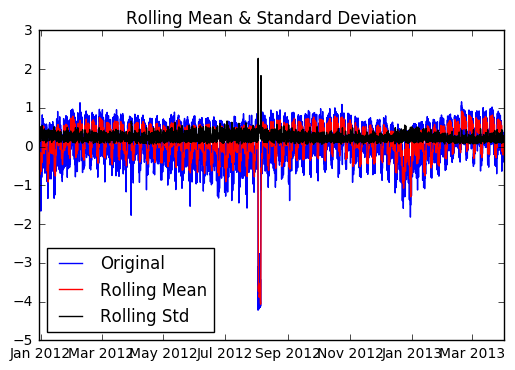

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [18]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,min_periods=0,ignore_na=False,halflife=12).mean()
  if __name__ == '__main__':


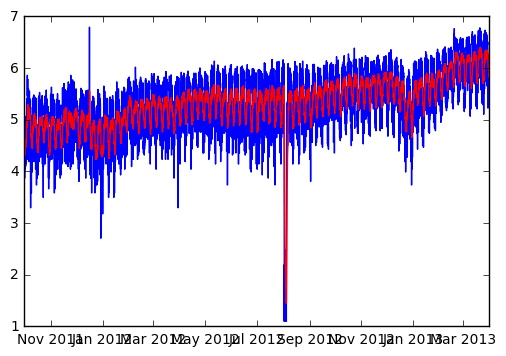

In [19]:
expwighted_avg = pd.ewma(newtrain_log, halflife=12)
plt.plot(newtrain_log)
plt.plot(expwighted_avg, color='red')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


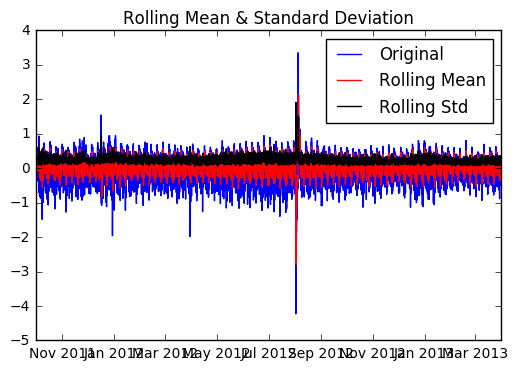

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [20]:
ts_log_ewma_diff = newtrain_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

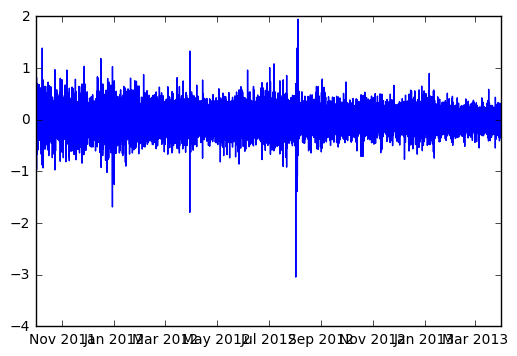

In [21]:
ts_log_diff = newtrain_log - newtrain_log.shift()
plt.plot(ts_log_diff)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


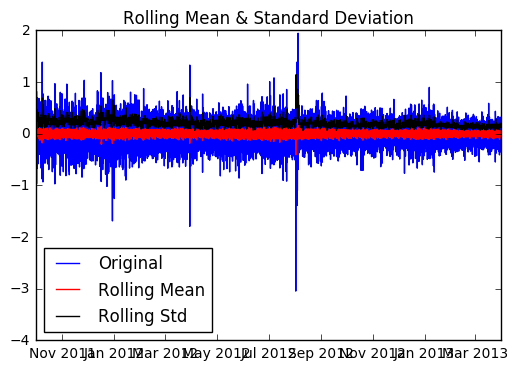

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [22]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [25]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [26]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

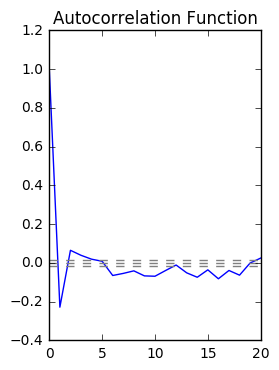

In [27]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

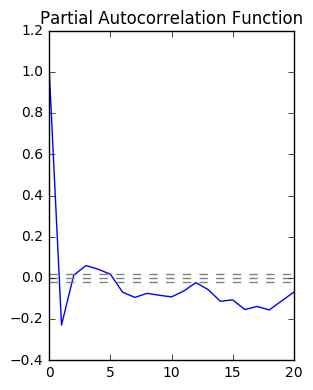

In [28]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [29]:
from statsmodels.tsa.arima_model import ARIMA

ValueError: Cannot add integral value to Timestamp without offset.

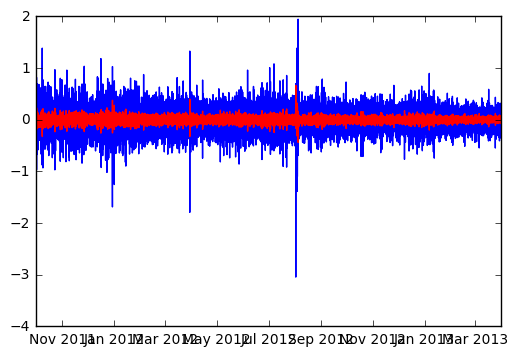

In [30]:

model = ARIMA(newtrain_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


ValueError: Cannot add integral value to Timestamp without offset.

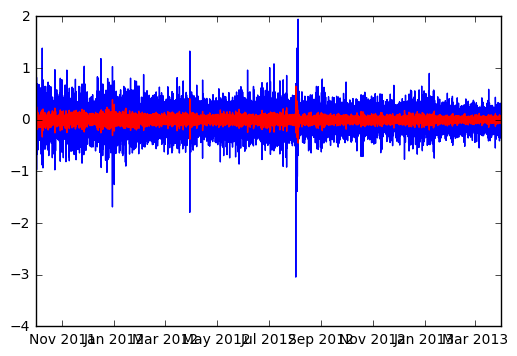

In [31]:
model = ARIMA(newtrain_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

ValueError: Cannot add integral value to Timestamp without offset.

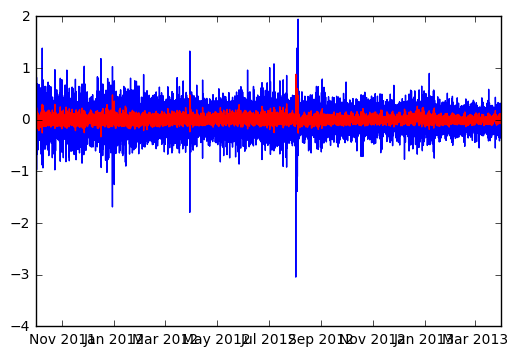

In [32]:
model = ARIMA(newtrain_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [33]:
print(train.head())

                   ID  Count
0 2011-10-01 00:00:00    135
1 2011-10-01 01:00:00     96
2 2011-10-01 02:00:00    111
3 2011-10-01 03:00:00    102
4 2011-10-01 04:00:00     54


In [34]:
print(test.head())

          ﻿ID  Count
0  2013040100    NaN
1  2013040101    NaN
2  2013040102    NaN
3  2013040103    NaN
4  2013040104    NaN


In [35]:
train['ID']

0       2011-10-01 00:00:00
1       2011-10-01 01:00:00
2       2011-10-01 02:00:00
3       2011-10-01 03:00:00
4       2011-10-01 04:00:00
5       2011-10-01 05:00:00
6       2011-10-01 06:00:00
7       2011-10-01 07:00:00
8       2011-10-01 08:00:00
9       2011-10-01 09:00:00
10      2011-10-01 10:00:00
11      2011-10-01 11:00:00
12      2011-10-01 12:00:00
13      2011-10-01 13:00:00
14      2011-10-01 14:00:00
15      2011-10-01 15:00:00
16      2011-10-01 16:00:00
17      2011-10-01 17:00:00
18      2011-10-01 18:00:00
19      2011-10-01 19:00:00
20      2011-10-01 20:00:00
21      2011-10-01 21:00:00
22      2011-10-01 22:00:00
23      2011-10-01 23:00:00
24      2011-10-02 00:00:00
25      2011-10-02 01:00:00
26      2011-10-02 02:00:00
27      2011-10-02 03:00:00
28      2011-10-02 04:00:00
29      2011-10-02 05:00:00
                ...        
13122   2013-03-30 18:00:00
13123   2013-03-30 19:00:00
13124   2013-03-30 20:00:00
13125   2013-03-30 21:00:00
13126   2013-03-30 2

In [37]:
test['\ufeffID'] = test['\ufeffID'].astype(str)
test['\ufeffID'] = test['\ufeffID'].apply(dateparse)

In [38]:
list(test)

['\ufeffID', 'Count']

In [39]:
newtest = test.set_index('\ufeffID')

In [40]:
pred = results_ARIMA.predict(newtest)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [41]:
print(newtest.head())
pred = results_ARIMA.predict(start='2013-04-01 00:00:00',end='2013-07-31 23:00:00')

                     Count
﻿ID                       
2013-04-01 00:00:00    NaN
2013-04-01 01:00:00    NaN
2013-04-01 02:00:00    NaN
2013-04-01 03:00:00    NaN
2013-04-01 04:00:00    NaN


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [43]:
predictions_ARIMA_diff = pd.Series(pred, copy=True)

In [44]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [45]:
predictions_ARIMA_log = np.exp(predictions_ARIMA_diff_cumsum)

In [46]:
predictions_ARIMA_log = pd.Series(newtrain_log.ix[-1], index=newtest.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

﻿ID
2013-04-01 00:00:00    0.016537
2013-04-01 01:00:00    0.005951
2013-04-01 02:00:00    0.004755
2013-04-01 03:00:00    0.000811
2013-04-01 04:00:00   -0.001883
dtype: float64

In [47]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

NameError: name 'ts' is not defined

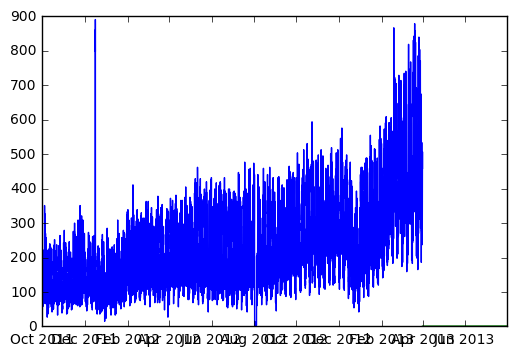

In [48]:
plt.plot(newtrain)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(newtrain)))

In [49]:
print(predictions_ARIMA)

﻿ID
2013-04-01 00:00:00    1.016674
2013-04-01 01:00:00    1.005969
2013-04-01 02:00:00    1.004766
2013-04-01 03:00:00    1.000811
2013-04-01 04:00:00    0.998118
2013-04-01 05:00:00    0.995331
2013-04-01 06:00:00    0.992872
2013-04-01 07:00:00    0.990578
2013-04-01 08:00:00    0.988481
2013-04-01 09:00:00    0.986549
2013-04-01 10:00:00    0.984776
2013-04-01 11:00:00    0.983147
2013-04-01 12:00:00    0.981650
2013-04-01 13:00:00    0.980276
2013-04-01 14:00:00    0.979015
2013-04-01 15:00:00    0.977859
2013-04-01 16:00:00    0.976798
2013-04-01 17:00:00    0.975825
2013-04-01 18:00:00    0.974934
2013-04-01 19:00:00    0.974119
2013-04-01 20:00:00    0.973373
2013-04-01 21:00:00    0.972691
2013-04-01 22:00:00    0.972069
2013-04-01 23:00:00    0.971501
2013-04-02 00:00:00    0.970984
2013-04-02 01:00:00    0.970513
2013-04-02 02:00:00    0.970085
2013-04-02 03:00:00    0.969697
2013-04-02 04:00:00    0.969346
2013-04-02 05:00:00    0.969029
                         ...   
2013